<a href="https://colab.research.google.com/github/aflores/colab-notebooks/blob/master/benford_chisquare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Benford's Law

In this kata we practice how to apply the Chi-square test to determine if a list of number follow Benford's Law.

But let's start by answering a couple of questions:

- What is Benford's Law?
- Why is this usefull?
- How do we know that a given list of numbers follow Benford's Law?


## What is Benford's Law?
According to wikipedia:

Benford's law, also called the Newcomb–Benford law, the law of anomalous numbers, or the first-digit law, is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. 

According to this law the first (or most signfcant) digit in may real-life sets of numbers follow this distribution

| digit | % distribution |
|----| ------|
| 1 | 30.1 |
| 2 | 17.6 |
| 3 | 12.5 |
| 4 | 9.7 |
| 5 | 7.9 |
| 6 | 6.7 |
| 7 | 5.8 |
| 8 | 5.1 |
| 9 | 4.6 | 


## Why is this usefull?

## How do we know that a given list of numbers follow Benford's Law?




## Resources

- https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95

- https://www.youtube.com/watch?v=2QeDRsxSF9M

In [18]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## experimental data, protein size, ...
naa = [40055, 27711, 36332, 13309, 12808, 3425, 56868, 44400, 26557, 48423, 
       14844, 47584, 26641, 27510, 21004, 13527, 80355, 34317, 33004, 32609, 
       37652, 27852, 192897, 62837, 18936, 27551, 20574, 18708, 31629, 36769, 
       3394, 51287, 37785, 44999, 19053, 64524, 24274, 44360, 11626, 24942, 
       18248, 9086, 36636, 22415, 55285, 61596, 64841, 16850, 36145, 28193, 
       36236, 14643, 5064, 11241, 2890, 29797, 14445, 14332, 33444, 58127, 64262, 
       12374, 45264, 13555, 5026, 27469, 41704, 11652, 9654, 27854, 60503, 26307, 
       36306, 43643, 8511, 103416, 16914, 63771, 27967, 55336, 33749, 37857, 34322, 
       9149, 30535, 11454, 53351, 85349, 152093, 50425, 34097, 25820, 41280, 64104, 
       54594, 49515, 46720, 35481, 24628, 37274, 54113, 39747, 39373, 15803, 30657, 
       39552, 41612, 37797, 10416, 33914, 17017, 40889, 10288, 67021, 42538, 8436, 
       38042, 11930, 77894, 50805, 23632, 49670, 2614, 23954, 9860, 57545, 46826, 
       58679, 69640, 23940, 50590, 27693, 35705, 21997, 40607, 5414, 38285, 11261, 
       123691, 51860, 49265, 5125, 46084, 29732, 15568, 18376, 14352, 38818, 17392, 
       32460, 50364, 4421, 7161, 18344, 21850, 25299, 14129, 14530, 22150, 35136, 
       5170, 43089, 5748, 43761, 33491, 43027, 66908, 20856, 35835, 34878, 17926, 
       16568, 27354, 72621, 131102, 11916, 17526, 29761, 84144, 26944, 9300, 626, 23406, 62492, 4230, 4195, 5897, 10393, 64900, 25675, 29653, 20305, 6523, 26771, 13912, 38499, 44921, 9045, 44187, 1344, 7177, 32502, 37091, 88008, 22020, 6790, 15748, 19431, 56321, 5683, 20250, 20437, 29473, 44684, 25930, 30302, 14574, 136485, 35242, 49883, 23935, 1640, 33338, 1508, 70164, 36366, 70161, 36666, 36970, 39757, 82280, 37944, 40951, 27397, 69690, 35003, 66168, 87552, 126056, 57127, 40335, 63955, 125260, 14674, 21548, 14656, 21934, 7862, 24767, 10811, 32661, 46748, 25467, 58673, 11264, 60199, 18799, 6513, 2253, 36712, 22885, 17548, 29870, 37949, 15386, 62111, 51134, 1735, 18269, 82362, 34355, 13199, 16853, 39614, 46452, 13833, 53883, 37563, 36637, 22871, 39574, 30017, 1147, 13522, 44112, 36598, 12525, 10614, 15627, 44802, 47193, 53677, 61054, 12945, 42905, 2558, 331774, 6734, 21457, 51491, 37197, 13542, 16495, 109616, 31379, 17175, 76105, 27734, 25276, 14537, 38191, 22069, 41348, 34746, 35426, 39343, 37929, 47420, 28223, 27755, 27007, 30816, 15623, 98138, 42984, 46130, 12264, 21960, 40755, 98353, 12675, 100728, 57881, 27907, 25722, 18483, 17548, 53622, 71649, 13684, 33692, 96542, 35028, 19657, 12132, 16538, 101121, 19229, 25289, 22407, 72784, 19841, 22639, 81729, 53888, 82644, 49803, 23756, 17963, 42399, 8525, 56083, 37827, 83002, 32990, 20027, 7450, 12528, 10693, 34700, 24628, 25052, 30321, 52766, 13469, 25037, 22778, 27076, 18913, 12355, 60058, 41671, 64229, 79737, 30952, 81983, 11241, 26588, 30434, 34335, 75246, 7161, 42843, 2138, 58323, 19976, 29223, 13253, 15704, 43887, 15506, 42639, 13955, 78452, 33828, 24313, 40600, 21985, 14930, 88702, 57545, 17980, 32503, 35761, 161851, 40083, 41989, 3540, 75244, 21494, 96423, 41632, 34773, 10560, 98540, 27657, 10265, 22645, 65203, 30809, 48566, 59685, 36875, 7296, 11701, 118950, 35185, 15649, 52043, 13751, 36057, 55694, 71607, 143626, 15604, 16713, 24177, 158598, 19304, 13964, 42171, 29018, 50340, 36697, 26844, 36021, 56938, 11576, 33854, 55018, 64000, 36293, 27211, 6570, 102953, 31491, 47414, 37642, 14435, 20439, 22358, 19793, 17889, 29894, 21665, 8835, 24870, 33024, 39666, 31076, 44038, 23011, 21942, 35205, 13883, 19044, 42900, 38668, 85282, 54053, 14979, 18090, 65513, 32238, 39368, 34105, 68725, 53162, 24792, 104422]

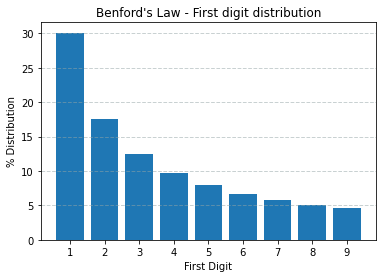

In [28]:
BENFORD_DIST = [30.1,17.6,12.5,9.7,7.9,6.7,5.8,5.1,4.6]

plt.bar(range(1,10), BENFORD_DIST)
plt.title("Benford's Law - First digit distribution")
plt.xticks(np.arange(1, 10, 1))
plt.xlabel('First Digit')
plt.ylabel('% Distribution')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)


In [54]:
# runtime flags
# these are boolean to determine if a particualar calculation (cell) show be executed when running the entire set
#calculate_obs_percentances = False
#caluculate_expected_values = False
khan_academy_example = True


In [85]:
# Khan Academy Example
if khan_academy_example:
  df = pd.DataFrame(index =['M','T','W','T','F','S'])
  df['observed'] = [30,14,34,45,57,20]
  obs_sum = np.sum(df['observed'])
  df['expected'] = obs_sum*np.array([.1,.1,.15,.2,.3,.15])
  print(df)
  print(stats.chisquare(df['observed'],df['expected']))
  

   observed  expected
M        30      20.0
T        14      20.0
W        34      30.0
T        45      40.0
F        57      60.0
S        20      30.0
Power_divergenceResult(statistic=11.441666666666666, pvalue=0.04329313031580497)


In [36]:
#
#
#
observed_values_name = 'protein sequence lengths' # ' Khan Academy '
observed_values =  naa #  [30,14,34, 45, 57, 20] #
pct_expected = BENFORD_DIST # [10,10,15,20,30,15] # 


In [37]:
# Return the leading digit of x, assuming x is a positive integer.

def leadingDigit(x):
    while x >= 10:
        x //= 10
    return x


In [78]:
# count the ocurrences of first digits
counts=np.empty(10) 
counts.fill(0)

pcts =  np.empty(10)
pcts.fill(0)
n = int(0)   # items read

for i in observed_values:
  digit = leadingDigit(i)
  counts[digit] += int(1)
  n += 1
                        

In [79]:
print(f"From {observed_values_name} with {n} observations")
for i in range(1,10):
    val = 100 * float(counts[i]) / float(n)
    pcts[i] = val
    print(f'{i:1n}: count:{counts[i]:4n}\tpct:{val:5.1f}')

From protein sequence lengths with 500 observations
1: count: 125	pct: 25.0
2: count:  95	pct: 19.0
3: count: 100	pct: 20.0
4: count:  58	pct: 11.6
5: count:  45	pct:  9.0
6: count:  31	pct:  6.2
7: count:  18	pct:  3.6
8: count:  17	pct:  3.4
9: count:  11	pct:  2.2


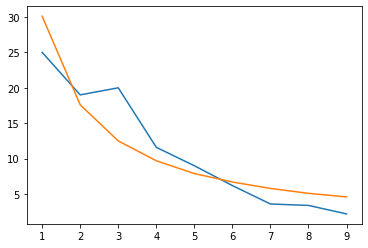

In [80]:


plt.plot(range(1,10), pcts[1:])
plt.plot(range(1,10), BENFORD)
plt.show()

In [81]:
expected = 5*np.array(BENFORD)

In [82]:
df = pd.DataFrame(index =['1','2','3','4','5','6','7','8','9'])
df['observed'] = counts[1:]
df['expected'] = expected
df

,observed,expected
1,125.0,150.5
2,95.0,88.0
3,100.0,62.5
4,58.0,48.5
5,45.0,39.5
6,31.0,33.5
7,18.0,29.0
8,17.0,25.5
9,11.0,23.0


In [83]:
stats.chisquare(df['observed'],df['expected'])

Power_divergenceResult(statistic=43.45724757137415, pvalue=7.203359522486073e-07)